# Fastai Experimentation

This notebook is intended to be used after running the google image scraper in this repo. To get started follow the README.md in this repo, then come back after all the csv files have been generated, labeled, and saved in the data_csv directory.

In [5]:
from fastai.vision import *
import os
path = Path(f'../../data_csv')

### Define Experiment
Running this cell will save the images and any saved models in a directory with the experiments name.

In [10]:
experiment = 'trees_and_leaves_v3'

In [3]:
dest_path = Path(f'../../data')
img_path = dest_path/experiment

## Check Classes

In [4]:
classes = os.listdir(f'../../data/{experiment}')
for c in classes:
    print(c)
#     verify_images(img_path/c, delete=True, max_size=500)

Katsura_tree
Japanese_Spice_Tree
silk_tree
Japanese_Pagoda_Tree
maidenhair_tree
Gerard_pea_tree
strawberry_tree
exported.pkl
Smiling_Forest_Lily_Tree
Japanese_Tree_Lilac
Hop_Tree
models
Franklin_Tree
Pepper_Tree
Japanese_Raisin_Tree
Camphor_Tree
Tulip_Tree
Golden_Chain_Tree
Chinese_Tulip_Tree
Buddhaism_tree
Toothache_tree
Dove_Tree
Fragrant_Epaulette_Tree
Isu_tree
Amur_Cork_Tree
Iigiri_Tree
tree_of_heaven
Purple_Smoketree
California_Hoptree
Siberian_pea-tree
spindletree
Orange_ball_tree
Golden_Rain_Tree
Bigleaf_Cucumber_Tree
Yellow_Willow_Tree
fringe_tree
Hardy_Silk_Tree
Kentucky_coffee_tree
servicetree
London_Plane_Tree
tree_anemone
royal_paulownia
Henry_anise_tree
Wheel_Tree
Tree_Peony
Korean_Bee-Bee_Tree
Sourwood_Tree
alpine_celery_tree
Wedding_Cake_Tree
Judas_tree
Chilean_lily-of-the-valley_tree


## Create ImageDataBunch for Training

In [5]:
np.random.seed(42)
data = ImageDataBunch.from_folder(img_path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

## Show Classes to be Trained

In [6]:
data.classes

['Amur_Cork_Tree',
 'Bigleaf_Cucumber_Tree',
 'Buddhaism_tree',
 'California_Hoptree',
 'Camphor_Tree',
 'Chilean_lily-of-the-valley_tree',
 'Chinese_Tulip_Tree',
 'Dove_Tree',
 'Fragrant_Epaulette_Tree',
 'Franklin_Tree',
 'Gerard_pea_tree',
 'Golden_Chain_Tree',
 'Golden_Rain_Tree',
 'Hardy_Silk_Tree',
 'Henry_anise_tree',
 'Hop_Tree',
 'Iigiri_Tree',
 'Isu_tree',
 'Japanese_Pagoda_Tree',
 'Japanese_Raisin_Tree',
 'Japanese_Spice_Tree',
 'Japanese_Tree_Lilac',
 'Judas_tree',
 'Katsura_tree',
 'Kentucky_coffee_tree',
 'Korean_Bee-Bee_Tree',
 'London_Plane_Tree',
 'Orange_ball_tree',
 'Pepper_Tree',
 'Purple_Smoketree',
 'Siberian_pea-tree',
 'Smiling_Forest_Lily_Tree',
 'Sourwood_Tree',
 'Toothache_tree',
 'Tree_Peony',
 'Tulip_Tree',
 'Wedding_Cake_Tree',
 'Wheel_Tree',
 'Yellow_Willow_Tree',
 'alpine_celery_tree',
 'fringe_tree',
 'maidenhair_tree',
 'royal_paulownia',
 'servicetree',
 'silk_tree',
 'spindletree',
 'strawberry_tree',
 'tree_anemone',
 'tree_of_heaven']

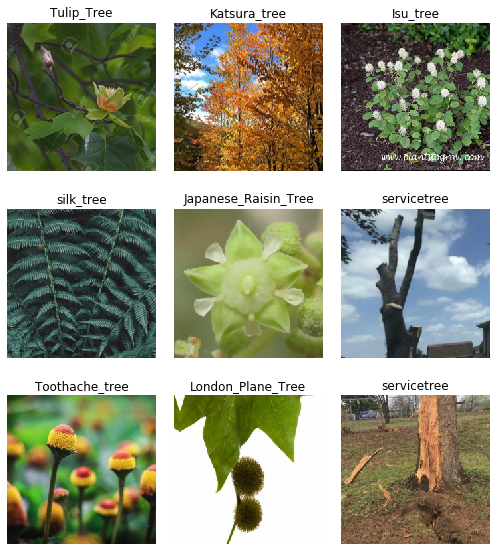

In [9]:
data.show_batch(rows=3, figsize=(7,8))

In [10]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['Amur_Cork_Tree',
  'Bigleaf_Cucumber_Tree',
  'Buddhaism_tree',
  'California_Hoptree',
  'Camphor_Tree',
  'Chilean_lily-of-the-valley_tree',
  'Chinese_Tulip_Tree',
  'Dove_Tree',
  'Fragrant_Epaulette_Tree',
  'Franklin_Tree',
  'Gerard_pea_tree',
  'Golden_Chain_Tree',
  'Golden_Rain_Tree',
  'Hardy_Silk_Tree',
  'Henry_anise_tree',
  'Hop_Tree',
  'Iigiri_Tree',
  'Isu_tree',
  'Japanese_Pagoda_Tree',
  'Japanese_Raisin_Tree',
  'Japanese_Spice_Tree',
  'Japanese_Tree_Lilac',
  'Judas_tree',
  'Katsura_tree',
  'Kentucky_coffee_tree',
  'Korean_Bee-Bee_Tree',
  'London_Plane_Tree',
  'Orange_ball_tree',
  'Pepper_Tree',
  'Purple_Smoketree',
  'Siberian_pea-tree',
  'Smiling_Forest_Lily_Tree',
  'Sourwood_Tree',
  'Toothache_tree',
  'Tree_Peony',
  'Tulip_Tree',
  'Wedding_Cake_Tree',
  'Wheel_Tree',
  'Yellow_Willow_Tree',
  'alpine_celery_tree',
  'fringe_tree',
  'maidenhair_tree',
  'royal_paulownia',
  'servicetree',
  'silk_tree',
  'spindletree',
  'strawberry_tree',
  

In [11]:
learn = cnn_learner(data, models.resnet50, metrics=[error_rate, accuracy], callback_fns=[
    partial(callbacks.EarlyStoppingCallback, monitor='accuracy', min_delta=0.01, patience=5)])

# Load Best Model, and Export for Production

In [12]:
learn.load('bestmodel')

Learner(data=ImageDataBunch;

Train: LabelList (86896 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Katsura_tree,Katsura_tree,Katsura_tree,Katsura_tree,Katsura_tree
Path: ../../data/trees_and_leaves_v3;

Valid: LabelList (21724 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Japanese_Spice_Tree,silk_tree,silk_tree,silk_tree,Orange_ball_tree
Path: ../../data/trees_and_leaves_v3;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(

In [1]:
import torch
import torch.nn as nn
import numpy as np
from onnx_coreml import convert
from torch.autograd import Variable
import torch.onnx
import torchvision
import onnx

In [2]:
import torchvision.models as models

In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [15]:
model = learn.model

In [16]:
model = torch.nn.Sequential(model, torch.nn.Softmax(1))

In [17]:
model.eval()

Sequential(
  (0): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (4): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu): ReLU(inplace=True)
          (downs

In [18]:
def save_model(model, device, path, name):
    base = path
    onnx_file = base.joinpath('{}.onnx'.format(name)).resolve()
    pth_file = base.joinpath('{}.pth'.format(name)).resolve()
    
    # create dummy variable to traverse graph
    x = torch.randint(255, (1,3,224, 224), dtype=torch.float).to(device) / 255
    torch.onnx.export(model, x, onnx_file)
    print('Saved onnx model to {}'.format(onnx_file))

In [20]:
save_model(model,device,Path(f'../../data/{experiment}'),'bestmodel')

Saved onnx model to /home/blakedanson/Desktop/repos/dataNotLore/data/trees_and_leaves_v3/bestmodel.onnx


In [4]:
from PIL import Image
img = Image.open('../../data/trees_and_leaves_v3/Tulip_Tree/00000014.jpg')
plt.imshow(img)

NameError: name 'plt' is not defined

In [7]:
from torchvision import transforms
transform = transforms.Compose([
 transforms.Resize(256),
 transforms.CenterCrop(224),
 transforms.ToTensor(),
 transforms.Normalize(
 mean=[0.485, 0.456, 0.406],
 std=[0.229, 0.224, 0.225]
 )])

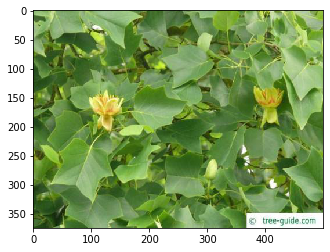

In [8]:
img_t = transform(img)
plt.imshow(img)
image = torch.unsqueeze(img_t, 0)
image = np.asarray(image).astype('float32')

In [11]:
import onnxruntime as rt

sess = rt.InferenceSession(f"../../data/{experiment}/bestmodel.onnx")
input_name = sess.get_inputs()[0].name
r = sess.run(None, {input_name: image})
# print("Shape={0} and predicted labels={1}".format(image.shape, r))
pred_onx = r
print(pred_onx)

[array([[2.074394e-06, 3.081975e-03, 3.019561e-06, 8.005158e-06, 2.442798e-06, 3.112991e-06, 1.987512e-01,
        1.299316e-06, 1.920949e-05, 4.474202e-07, 1.891628e-05, 4.212998e-06, 1.202494e-06, 1.545670e-05,
        2.388138e-05, 1.228291e-05, 5.649358e-06, 7.544077e-06, 6.704445e-07, 1.120628e-06, 4.720233e-06,
        2.261120e-06, 6.403058e-06, 1.286808e-05, 3.657809e-05, 3.985981e-06, 1.127356e-04, 2.145129e-05,
        1.283184e-07, 3.050035e-07, 1.682938e-05, 4.830535e-04, 1.633993e-05, 4.444198e-06, 1.740917e-06,
        7.966756e-01, 2.214257e-07, 7.206291e-07, 5.107787e-04, 4.143584e-07, 1.989733e-07, 7.075251e-05,
        6.375729e-06, 5.182902e-06, 1.768433e-05, 2.508871e-07, 2.089618e-05, 1.340364e-07, 3.439861e-06]],
      dtype=float32)]


In [12]:
labels = data.classes
print(labels)

NameError: name 'data' is not defined

In [13]:
label = labels[np.argmax(pred_onx)]
print(f'Prediction: {label}')

NameError: name 'labels' is not defined

In [106]:
max_activation = np.argmax(pred_onx)
confidence_score = pred_onx[0][0][max_activation]
print(f'Confidence score: {confidence_score}')

Confidence score: 0.7966755628585815


In [14]:
np.argmax(pred_onx[0])

35

In [15]:
print(list(map(lambda num: round(num,3),pred_onx[0][0])))

[0.0, 0.003, 0.0, 0.0, 0.0, 0.0, 0.199, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.797, 0.0, 0.0, 0.001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [16]:
%%time
sess = rt.InferenceSession(f"../../data/{experiment}/bestmodel.onnx")
# input_name = sess.get_inputs()[0].name
r = sess.run(None, {input_name: image})
# print("Shape={0} and predicted labels={1}".format(image.shape, r))
pred_onx = r[0]
print(pred_onx)

[[2.074394e-06 3.081975e-03 3.019561e-06 8.005158e-06 2.442798e-06 3.112991e-06 1.987512e-01 1.299316e-06 1.920949e-05
  4.474202e-07 1.891628e-05 4.212998e-06 1.202494e-06 1.545670e-05 2.388138e-05 1.228291e-05 5.649358e-06 7.544077e-06
  6.704445e-07 1.120628e-06 4.720233e-06 2.261120e-06 6.403058e-06 1.286808e-05 3.657809e-05 3.985981e-06 1.127356e-04
  2.145129e-05 1.283184e-07 3.050035e-07 1.682938e-05 4.830535e-04 1.633993e-05 4.444198e-06 1.740917e-06 7.966756e-01
  2.214257e-07 7.206291e-07 5.107787e-04 4.143584e-07 1.989733e-07 7.075251e-05 6.375729e-06 5.182902e-06 1.768433e-05
  2.508871e-07 2.089618e-05 1.340364e-07 3.439861e-06]]
CPU times: user 669 ms, sys: 73 ms, total: 742 ms
Wall time: 145 ms


## Onnx to Tensorflow Serving SavedModel Format

In [18]:
import json
import os
import pickle
import shutil

In [24]:
import numpy as np
import requests
import onnx
from onnx_tf.backend import prepare
import tensorflow as tf
from tensorflow.python.saved_model.utils import build_tensor_info
from tensorflow.python.saved_model import signature_def_utils
from tensorflow.python.saved_model import signature_constants




The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



/home/blakedanson/anaconda3/envs/fastai/lib/python3.6/site-packages/onnx_tf/common/__init__.py:89: UserWarning: onnx_tf.common.get_outputs_names is deprecated. It will be removed in future release. Use TensorflowGraph.get_outputs_names instead.
  warnings.warn(message)


In [25]:
from emnist_dl2prod.utils import eval_serving_performance

ModuleNotFoundError: No module named 'emnist_dl2prod'

In [26]:
onnx_model_path = f"../../data/{experiment}/bestmodel.onnx"
dnn_model_onnx = onnx.load(onnx_model_path)
dnn_model_tf = prepare(dnn_model_onnx, device='cpu')

/home/blakedanson/anaconda3/envs/fastai/lib/python3.6/site-packages/onnx_tf/common/handler_helper.py:37: UserWarning: Unknown op ConstantFill in domain `ai.onnx`.
  handler.ONNX_OP, handler.DOMAIN or "ai.onnx"))
/home/blakedanson/anaconda3/envs/fastai/lib/python3.6/site-packages/onnx_tf/common/handler_helper.py:34: UserWarning: Fail to get since_version of ConvInteger in domain `` with max_inclusive_version=9. Set to 1.
  handler.ONNX_OP, handler.DOMAIN, version))
/home/blakedanson/anaconda3/envs/fastai/lib/python3.6/site-packages/onnx_tf/common/handler_helper.py:34: UserWarning: Fail to get since_version of DequantizeLinear in domain `` with max_inclusive_version=9. Set to 1.
  handler.ONNX_OP, handler.DOMAIN, version))
/home/blakedanson/anaconda3/envs/fastai/lib/python3.6/site-packages/onnx_tf/common/handler_helper.py:37: UserWarning: Unknown op GatherND in domain `ai.onnx`.
  handler.ONNX_OP, handler.DOMAIN or "ai.onnx"))
/home/blakedanson/anaconda3/envs/fastai/lib/python3.6/site-pa


Instructions for updating:
tf.py_func is deprecated in TF V2. Instead, there are two
    options available in V2.
    - tf.py_function takes a python function which manipulates tf eager
    tensors instead of numpy arrays. It's easy to convert a tf eager tensor to
    an ndarray (just call tensor.numpy()) but having access to eager tensors
    means `tf.py_function`s can use accelerators such as GPUs as well as
    being differentiable using a gradient tape.
    - tf.numpy_function maintains the semantics of the deprecated tf.py_func
    (it is not differentiable, and manipulates numpy arrays). It drops the
    stateful argument making all functions stateful.
    


/home/blakedanson/anaconda3/envs/fastai/lib/python3.6/site-packages/onnx_tf/handlers/backend/pool_mixin.py:209: UserWarning: Using the pooling op in compatibility mode.This means your graph cannot be serialized.Please configure your pooling operation to only use paddings that correspond to Tensorflow SAME or VALID padding.
  "correspond to Tensorflow SAME or VALID padding.", UserWarning)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
Create a `tf.sparse.SparseTensor` and use `tf.sparse.to_dense` instead.
Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.


In [27]:
export_path = f'../../data/{experiment}/tf_model/'
# if os.path.exists(export_path):
#     shutil.rmtree(export_path)

model_version = 1
model_name = 'tf_bestmodel'
model_path = os.path.join(f'../../data/{experiment}/tf_model','models', model_name, str(model_version))
builder = tf.saved_model.builder.SavedModelBuilder(model_path)

In [35]:
print("External Input: {}".format(dnn_model_tf.predict_net.external_input))
print("External Output: {}".format(dnn_model_tf.predict_net.external_output))
dnn_model_tf.graph.tensor_dict

AttributeError: 'TensorflowRep' object has no attribute 'input'

In [37]:
dnn_model_tf.run(image)[0][0]

array([2.074393e-06, 3.081976e-03, 3.019566e-06, 8.005171e-06, 2.442802e-06, 3.113000e-06, 1.987513e-01, 1.299317e-06,
       1.920954e-05, 4.474205e-07, 1.891631e-05, 4.213005e-06, 1.202496e-06, 1.545669e-05, 2.388141e-05, 1.228292e-05,
       5.649373e-06, 7.544089e-06, 6.704450e-07, 1.120630e-06, 4.720232e-06, 2.261123e-06, 6.403074e-06, 1.286811e-05,
       3.657819e-05, 3.985979e-06, 1.127358e-04, 2.145128e-05, 1.283184e-07, 3.050040e-07, 1.682942e-05, 4.830539e-04,
       1.633997e-05, 4.444205e-06, 1.740917e-06, 7.966753e-01, 2.214257e-07, 7.206310e-07, 5.107790e-04, 4.143598e-07,
       1.989732e-07, 7.075249e-05, 6.375745e-06, 5.182905e-06, 1.768434e-05, 2.508875e-07, 2.089625e-05, 1.340366e-07,
       3.439866e-06], dtype=float32)

In [39]:
%%time
dnn_model_tf.run(image)[0][0]

CPU times: user 6.16 s, sys: 747 ms, total: 6.91 s
Wall time: 5.25 s


array([2.074393e-06, 3.081976e-03, 3.019566e-06, 8.005171e-06, 2.442802e-06, 3.113000e-06, 1.987513e-01, 1.299317e-06,
       1.920954e-05, 4.474205e-07, 1.891631e-05, 4.213005e-06, 1.202496e-06, 1.545669e-05, 2.388141e-05, 1.228292e-05,
       5.649373e-06, 7.544089e-06, 6.704450e-07, 1.120630e-06, 4.720232e-06, 2.261123e-06, 6.403074e-06, 1.286811e-05,
       3.657819e-05, 3.985979e-06, 1.127358e-04, 2.145128e-05, 1.283184e-07, 3.050040e-07, 1.682942e-05, 4.830539e-04,
       1.633997e-05, 4.444205e-06, 1.740917e-06, 7.966753e-01, 2.214257e-07, 7.206310e-07, 5.107790e-04, 4.143598e-07,
       1.989732e-07, 7.075249e-05, 6.375745e-06, 5.182905e-06, 1.768434e-05, 2.508875e-07, 2.089625e-05, 1.340366e-07,
       3.439866e-06], dtype=float32)

In [49]:
input_tensor = dnn_model_tf.graph.get_tensor_by_name('input.1:0')
output_tensor = dnn_model_tf.graph.get_tensor_by_name('Softmax:0')

input_tensor_info = build_tensor_info(input_tensor)
output_tensor_info = build_tensor_info(output_tensor)

In [50]:
op = dnn_model_tf.graph.get_operations()
[m.values() for m in op]

[(<tf.Tensor 'Const:0' shape=(64, 3, 7, 7) dtype=float32>,),
 (<tf.Tensor 'Const_1:0' shape=(64,) dtype=float32>,),
 (<tf.Tensor 'Const_2:0' shape=() dtype=int64>,),
 (<tf.Tensor 'Const_3:0' shape=(64,) dtype=float32>,),
 (<tf.Tensor 'Const_4:0' shape=(64,) dtype=float32>,),
 (<tf.Tensor 'Const_5:0' shape=(64,) dtype=float32>,),
 (<tf.Tensor 'Const_6:0' shape=(64,) dtype=float32>,),
 (<tf.Tensor 'Const_7:0' shape=() dtype=int64>,),
 (<tf.Tensor 'Const_8:0' shape=(64,) dtype=float32>,),
 (<tf.Tensor 'Const_9:0' shape=(64,) dtype=float32>,),
 (<tf.Tensor 'Const_10:0' shape=(64,) dtype=float32>,),
 (<tf.Tensor 'Const_11:0' shape=(64,) dtype=float32>,),
 (<tf.Tensor 'Const_12:0' shape=() dtype=int64>,),
 (<tf.Tensor 'Const_13:0' shape=(64,) dtype=float32>,),
 (<tf.Tensor 'Const_14:0' shape=(64,) dtype=float32>,),
 (<tf.Tensor 'Const_15:0' shape=(64,) dtype=float32>,),
 (<tf.Tensor 'Const_16:0' shape=(256,) dtype=float32>,),
 (<tf.Tensor 'Const_17:0' shape=() dtype=int64>,),
 (<tf.Tensor 'C

In [51]:
classification_signature = (
    signature_def_utils.build_signature_def(
        inputs={
            signature_constants.CLASSIFY_INPUTS:
                input_tensor_info
        },
        outputs={
            signature_constants.CLASSIFY_OUTPUT_SCORES:
                output_tensor_info
        },
        method_name=signature_constants.CLASSIFY_METHOD_NAME))

In [52]:
classification_signature

inputs {
  key: "inputs"
  value {
    name: "input.1:0"
    dtype: DT_FLOAT
    tensor_shape {
      dim {
        size: 1
      }
      dim {
        size: 3
      }
      dim {
        size: 224
      }
      dim {
        size: 224
      }
    }
  }
}
outputs {
  key: "scores"
  value {
    name: "Softmax:0"
    dtype: DT_FLOAT
    tensor_shape {
      dim {
        size: 1
      }
      dim {
        size: 49
      }
    }
  }
}
method_name: "tensorflow/serving/classify"

In [55]:

prediction_signature = (
    signature_def_utils.build_signature_def(
        inputs={'images': input_tensor_info},
        outputs={'scores': output_tensor_info},
        method_name=signature_constants.PREDICT_METHOD_NAME
        )
    )

In [56]:
with dnn_model_tf.graph.as_default():
    with tf.Session() as sess:
        builder.add_meta_graph_and_variables(
          sess, [tf.saved_model.tag_constants.SERVING],
          signature_def_map={
              'predict_images':
                  prediction_signature,
              signature_constants.DEFAULT_SERVING_SIGNATURE_DEF_KEY:
                  classification_signature,
          },
          main_op=tf.tables_initializer(),
          strip_default_attrs=True)
        builder.save()
        print("Done exporting!")

INFO:tensorflow:No assets to save.
INFO:tensorflow:No assets to write.
INFO:tensorflow:SavedModel written to: ../../data/trees_and_leaves_v3/tf_model/models/tf_bestmodel/1/saved_model.pb
Done exporting!


In [ ]:
'''
Next I ran tensorflow/serving docker container pointing to the model 
that was just converted to savedModel format. Which produced the following issue:

2020-03-06 22:25:45.186570: I external/org_tensorflow/tensorflow/cc/saved_model/reader.cc:31] Reading SavedModel from: /models/tf_bestmodel/1
2020-03-06 22:25:45.231109: I external/org_tensorflow/tensorflow/cc/saved_model/reader.cc:54] Reading meta graph with tags { serve }
2020-03-06 22:25:45.231139: I external/org_tensorflow/tensorflow/cc/saved_model/loader.cc:264] Reading SavedModel debug info (if present) from: /models/tf_bestmodel/1
2020-03-06 22:25:45.249239: I external/org_tensorflow/tensorflow/cc/saved_model/loader.cc:333] SavedModel load for tags { serve }; Status: fail: Invalid argument: No OpKernel was registered to support Op 'PyFunc' used by {{node PyFunc}}with these attrs: [Tin=[DT_FLOAT, DT_INT32, DT_INT32, DT_INT32, DT_INT32, DT_INT32, DT_STRING], _output_shapes=[[1,64,56,56]], Tout=[DT_FLOAT], token="pyfunc_0"]
Registered devices: [CPU]
Registered kernels:
  <no registered kernels>

         [[PyFunc]]. Took 62681 microseconds.
'''


In [57]:
# docker run -p 8501:8501 \
#   --mount type=bind,source=/home/blakedanson/Desktop/repos/dataNotLore/data/trees_and_leaves_v3/tf_model/models/tf_bestmodel/,target=/models/tf_bestmodel \
#   -e MODEL_NAME=tf_bestmodel -t tensorflow/serving